In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('./NHANES_age_prediction.csv')

EDA

In [3]:

print(df.head())

print(df.describe())

print(df.info())

      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN  
0   150.0  14.91  
1    80.0   3.85  
2    68.0   6.14  
3    84.0  16.15  
4    81.0  10.92  
               SEQN     RIDAGEYR     RIAGENDR       PAQ605       BMXBMI  \
count   2278.000000  2278.000000  2278.000000  2278.000000  2278.000000   
mean   78691.853819    41.795874     1.511414     1.822651    27.955180   
std     2921.365151    20.156111     0.499979     0.398918     7.248962   
min    73564.000000    12.000000     1.000000     1.000000    14.500000   
25%    76171.750000    24.000000     1.000000     2.00

In [4]:
print(*df.columns, sep=', ')

SEQN, age_group, RIDAGEYR, RIAGENDR, PAQ605, BMXBMI, LBXGLU, DIQ010, LBXGLT, LBXIN


Adult     1914
Senior     364
Name: age_group, dtype: int64


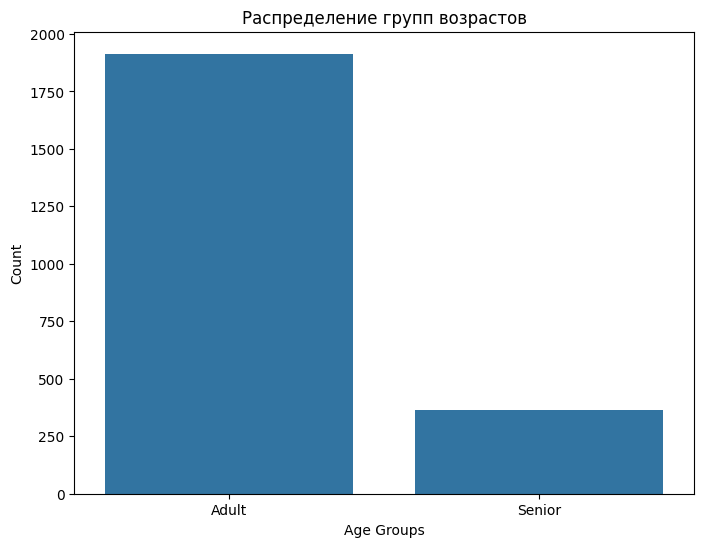

In [4]:

age_group_counts = df['age_group'].value_counts()
print(age_group_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', data=df)
plt.title('Распределение групп возрастов')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()


              SEQN  RIDAGEYR  RIAGENDR    PAQ605    BMXBMI    LBXGLU  \
SEQN      1.000000 -0.008806 -0.012962 -0.019701 -0.061343 -0.004147   
RIDAGEYR -0.008806  1.000000  0.006398  0.025973  0.147163  0.229624   
RIAGENDR -0.012962  0.006398  1.000000  0.151076  0.063873 -0.132342   
PAQ605   -0.019701  0.025973  0.151076  1.000000 -0.042935 -0.007849   
BMXBMI   -0.061343  0.147163  0.063873 -0.042935  1.000000  0.208330   
LBXGLU   -0.004147  0.229624 -0.132342 -0.007849  0.208330  1.000000   
DIQ010    0.014102  0.049970 -0.032769 -0.002599  0.047133 -0.004427   
LBXGLT    0.006036  0.318044  0.017406  0.060413  0.193375  0.685579   
LBXIN    -0.040028 -0.091879 -0.016660  0.010011  0.552717  0.211911   

            DIQ010    LBXGLT     LBXIN  
SEQN      0.014102  0.006036 -0.040028  
RIDAGEYR  0.049970  0.318044 -0.091879  
RIAGENDR -0.032769  0.017406 -0.016660  
PAQ605   -0.002599  0.060413  0.010011  
BMXBMI    0.047133  0.193375  0.552717  
LBXGLU   -0.004427  0.685579  0.2

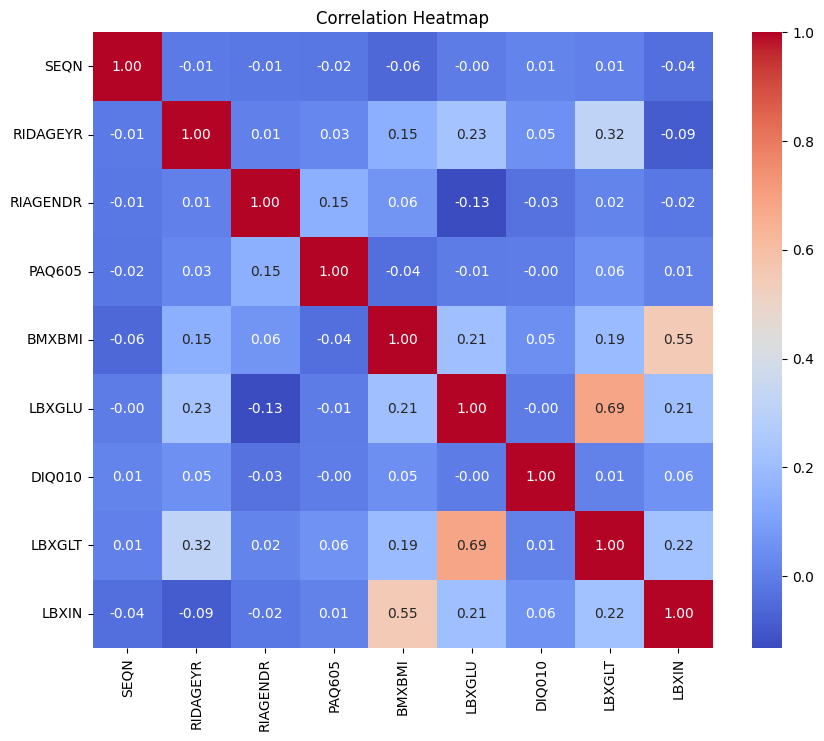

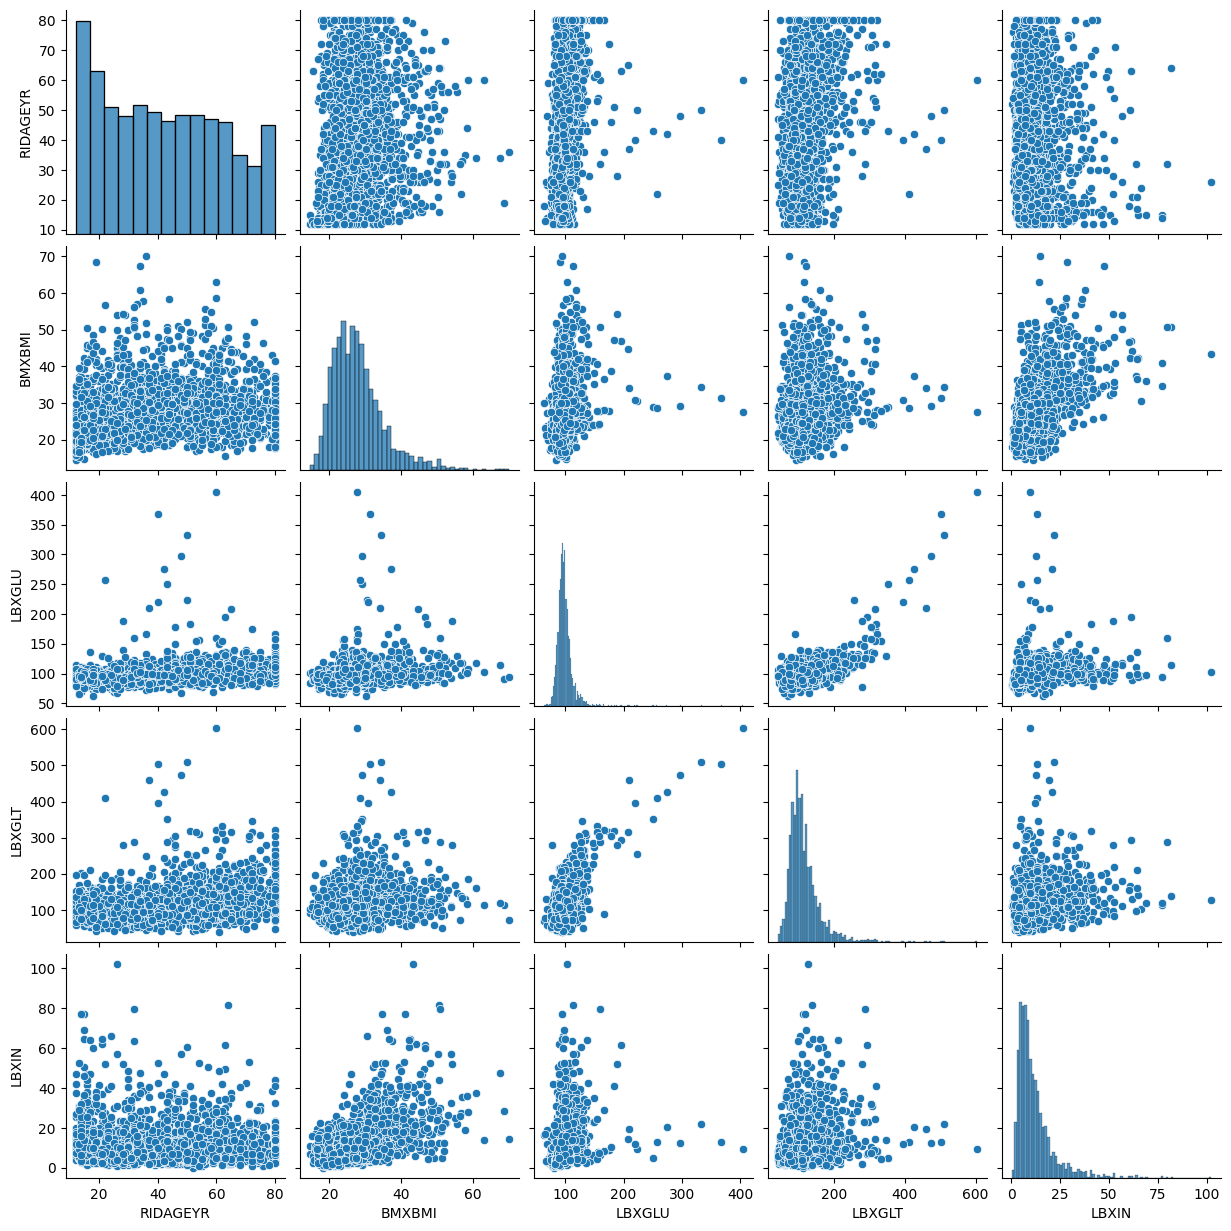

In [5]:

correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df[['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']])
plt.show()


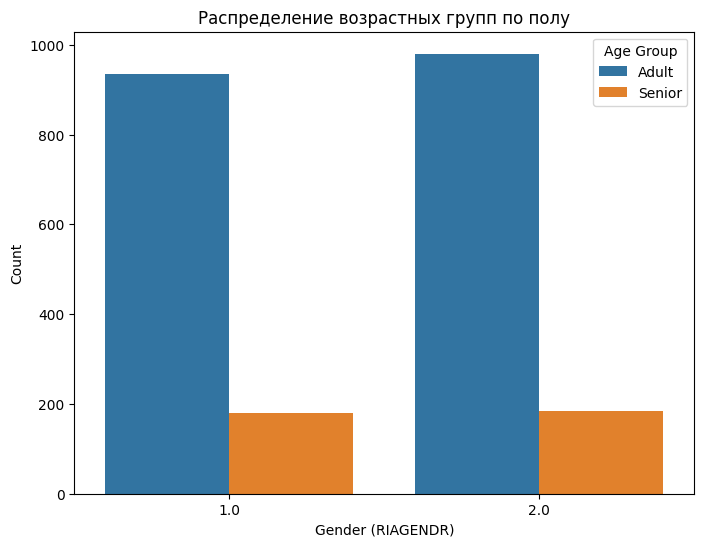

In [6]:

plt.figure(figsize=(8, 6))
sns.countplot(x='RIAGENDR', hue='age_group', data=df)
plt.title('Распределение возрастных групп по полу')
plt.xlabel('Gender (RIAGENDR)')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()


Проверка пропущенных значений

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64


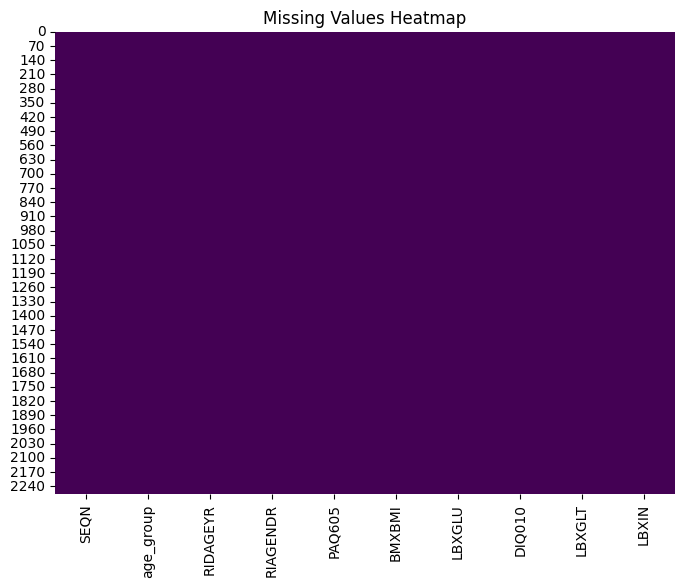

In [8]:

print(df.isnull().sum())

plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


Поскольку признак RIDAGEYR представляет собой возраст участников исследования, его нельзя использовать для построения модели классификации по возрастным категориям.

Я исключаю его из тренировочной выборки

In [5]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['age_group', 'RIDAGEYR'], axis=1), df['age_group'], stratify=df['age_group'], test_size=0.2, random_state=5)

In [9]:
scl = StandardScaler().fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

In [10]:
logreg = LogisticRegressionCV(Cs=10, cv=5, max_iter=1000, class_weight='balanced') 

logreg.fit(X_train, y_train)

LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=1000)

In [11]:
preds = logreg.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       Adult       0.90      0.79      0.84       383
      Senior       0.32      0.52      0.40        73

    accuracy                           0.75       456
   macro avg       0.61      0.66      0.62       456
weighted avg       0.81      0.75      0.77       456



In [12]:
import pickle
with open('logreg.pickle', 'wb') as f:
    pickle.dump(logreg, f)

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [14]:
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'],
                     'C': [1, 10, 100], 'class_weight': ['balanced']}]


cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=1, class_weight=balanced, gamma=scale, kernel=linear;, score=0.767 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, gamma=scale, kernel=linear;, score=0.737 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, gamma=scale, kernel=linear;, score=0.725 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, gamma=scale, kernel=linear;, score=0.720 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, gamma=scale, kernel=linear;, score=0.780 total time=   0.0s
[CV 1/5] END C=1, class_weight=balanced, gamma=scale, kernel=poly;, score=0.775 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, gamma=scale, kernel=poly;, score=0.721 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, gamma=scale, kernel=poly;, score=0.750 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, gamma=scale, kernel=poly;, score=0.723 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanc

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'class_weight': ['balanced'],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             verbose=3)

In [15]:
preds = cv.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       Adult       0.91      0.79      0.85       383
      Senior       0.35      0.58      0.43        73

    accuracy                           0.76       456
   macro avg       0.63      0.68      0.64       456
weighted avg       0.82      0.76      0.78       456



In [16]:
import pickle
with open('svm.pickle', 'wb') as f:
    pickle.dump(cv.best_estimator_, f)

In [17]:
from catboost import CatBoostClassifier, Pool

In [23]:
from sklearn.utils.class_weight import compute_class_weight
 
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

In [24]:
weights

array([0.59503592, 3.13058419])

In [34]:


# catboost_model = CatBoostClassifier(loss_function='Logloss', class_weights=class_weights)

catboost_model = CatBoostClassifier(loss_function='Logloss')

train_pool = Pool(data=X_train, label=y_train)

param_grid = {'iterations': [100, 500, 1000],
              'learning_rate': [0.01, 0.1, 0.5],
              'depth': [4, 6, 8, 12],
              'class_weights': [weights]}

grid_search_result = catboost_model.grid_search(param_grid, train_pool, cv=3, plot=True, verbose=False)

best_params = grid_search_result['params']
best_model = CatBoostClassifier(**best_params)

best_model.fit(X_train, y_train, verbose=False)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6914804	test: 0.6911556	best: 0.6911556 (0)	total: 1.24ms	remaining: 123ms
1:	learn: 0.6895795	test: 0.6901899	best: 0.6901899 (1)	total: 2.49ms	remaining: 122ms
2:	learn: 0.6880309	test: 0.6889923	best: 0.6889923 (2)	total: 3.73ms	remaining: 121ms
3:	learn: 0.6859437	test: 0.6872947	best: 0.6872947 (3)	total: 4.93ms	remaining: 118ms
4:	learn: 0.6840339	test: 0.6857292	best: 0.6857292 (4)	total: 6.02ms	remaining: 114ms
5:	learn: 0.6823781	test: 0.6846448	best: 0.6846448 (5)	total: 6.8ms	remaining: 107ms
6:	learn: 0.6807936	test: 0.6835622	best: 0.6835622 (6)	total: 8.85ms	remaining: 118ms
7:	learn: 0.6794021	test: 0.6822995	best: 0.6822995 (7)	total: 10.5ms	remaining: 120ms
8:	learn: 0.6777349	test: 0.6813123	best: 0.6813123 (8)	total: 12.1ms	remaining: 122ms
9:	learn: 0.6760641	test: 0.6800231	best: 0.6800231 (9)	total: 13.5ms	remaining: 122ms
10:	learn: 0.6746343	test: 0.6790322	best: 0.6790322 (10)	total: 14.8ms	remaining: 120ms
11:	learn: 0.6729857	test: 0.6774775	best:

In [37]:
preds = best_model.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       Adult       0.91      0.72      0.81       383
      Senior       0.30      0.62      0.40        73

    accuracy                           0.71       456
   macro avg       0.60      0.67      0.60       456
weighted avg       0.81      0.71      0.74       456



In [41]:
import pickle
with open('cb_model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

In [43]:
preds = best_model.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       Adult       0.91      0.72      0.81       383
      Senior       0.30      0.62      0.40        73

    accuracy                           0.71       456
   macro avg       0.60      0.67      0.60       456
weighted avg       0.81      0.71      0.74       456



Лучшие метрики показал SVM